In [67]:
import pandas as pd 
import numpy as np
import spacy
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\aksha\Downloads\Elon_musk.csv',encoding='latin1')

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## text preprocessing 

In [6]:
data=[x.strip() for x in data.Text]#remove the spaces at the end and beginning 

In [7]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
data=[Text for Text in data if Text]

In [9]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
join_text=' '.join(data)#for joining the datas 

In [11]:
join_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
from nltk.tokenize import TweetTokenizer  #used to remove username

In [13]:
tweettoken=TweetTokenizer(strip_handles='True')
tweets=tweettoken.tokenize(join_text)
tweets

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 'Great',
 'interview',
 '!',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 ',',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 'Himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thanks',
 ':)',
 'Indeed',
 '!',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'https://t.co/3rWE9uHSTS',
 'It',
 '

In [14]:
tweets_join=' '.join(tweets)
tweets_join

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [15]:
import string

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
no_pun=tweets_join.translate(str.maketrans('','',string.punctuation)) #removing punctuation 
no_pun

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [21]:
#remove url 
import re

In [26]:
no_url_text=re.sub(r'http\S+', '', no_pun)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [27]:
#word_tokenization
from nltk.tokenize import word_tokenize

In [28]:
tokenized=word_tokenize(no_url_text)

In [29]:
tokenized

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [31]:
#reomving stopwords and converting into small case letter 
from nltk.corpus import stopwords

In [40]:
stop_words=stopwords.words('english')
extend= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_words.extend(extend)
no_stop_words=[x.lower() for x in tokenized if x not in stop_words]
no_stop_words

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'it',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'thanks',
 'fixing',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'your',
 'app',
 'sucks',
 'rt',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',


In [45]:
#stemmer and lemmatization
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [42]:
porter_stemmer=PorterStemmer()

In [44]:
stemmed=[porter_stemmer.stem(x) for x in no_stop_words]
stemmed

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission',
 'onc'

In [46]:
lemm=WordNetLemmatizer()

In [48]:
lemmatized=[lemm.lemmatize(x) for x in stemmed]
lemmatized

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'plea',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission',
 'onc',

In [49]:
clean=' '.join(lemmatized)
clean

'alien ray trace cyberpunk hdr nextlevel have tri great interview doge underestim congratul tesla china amaz execut last year now next even happi new year ox frodo underdog all thought would fail himself haha thank inde tweet definit repres realworld time alloc the entertain outcom like just sent just agre clubhous it get real bought dogecoin lil x toddler hodler he definit issu sentenc seem bit high thank fix plea unlock account thi true power ani crypto wallet give privat key avoid cost your app suck rt nasa select falcon heavi launch first two element lunar gateway togeth one mission onc predict cash flow reason well starlink ipo starlink staggeringli difficult technic econom endeavor howev spacex need pas deep chasm neg cash flow next year lowest cost per ton carbon sequest net valu product made must scalabl g it meant price countri onli differ tax ship thi intend earth may idea appli mar xprize team manag 100m carbon captur prize everyon tesla receiv stock my comp stock option tak

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [51]:
# countvectorizer
count=CountVectorizer()

In [55]:
vectorized=count.fit_transform(lemmatized)


In [56]:
print(count.vocabulary_)

{'alien': 197, 'ray': 2222, 'trace': 2866, 'cyberpunk': 744, 'hdr': 1315, 'nextlevel': 1870, 'have': 1310, 'tri': 2883, 'great': 1259, 'interview': 1486, 'doge': 858, 'underestim': 3028, 'congratul': 658, 'tesla': 2776, 'china': 572, 'amaz': 219, 'execut': 1013, 'last': 1569, 'year': 3239, 'now': 1897, 'next': 1869, 'even': 992, 'happi': 1296, 'new': 1867, 'ox': 1985, 'frodo': 1162, 'underdog': 3027, 'all': 199, 'thought': 2809, 'would': 3224, 'fail': 1046, 'himself': 1356, 'haha': 1285, 'thank': 2784, 'inde': 1444, 'tweet': 2910, 'definit': 780, 'repres': 2278, 'realworld': 2235, 'time': 2825, 'alloc': 200, 'the': 2788, 'entertain': 966, 'outcom': 1964, 'like': 1619, 'just': 1527, 'sent': 2424, 'agre': 182, 'clubhous': 602, 'it': 1505, 'get': 1216, 'real': 2230, 'bought': 451, 'dogecoin': 860, 'lil': 1620, 'toddler': 2836, 'hodler': 1361, 'he': 1316, 'issu': 1504, 'sentenc': 2425, 'seem': 2412, 'bit': 411, 'high': 1348, 'fix': 1105, 'plea': 2075, 'unlock': 3050, 'account': 145, 'thi':

In [58]:
vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
tfidf=TfidfTransformer()

In [63]:
tf=tfidf.fit_transform(vectorized)

In [64]:
tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# generating word cloud
from wordcloud import WordCloud

In [70]:
word_cloud=WordCloud(background_color='white',colormap='Set2',max_words=100).generate(clean)

In [79]:
def visual(word_cloud):
    plt.figure(figsize=(50,50))
    plt.imshow(word_cloud)
    plt.axis('off')
    

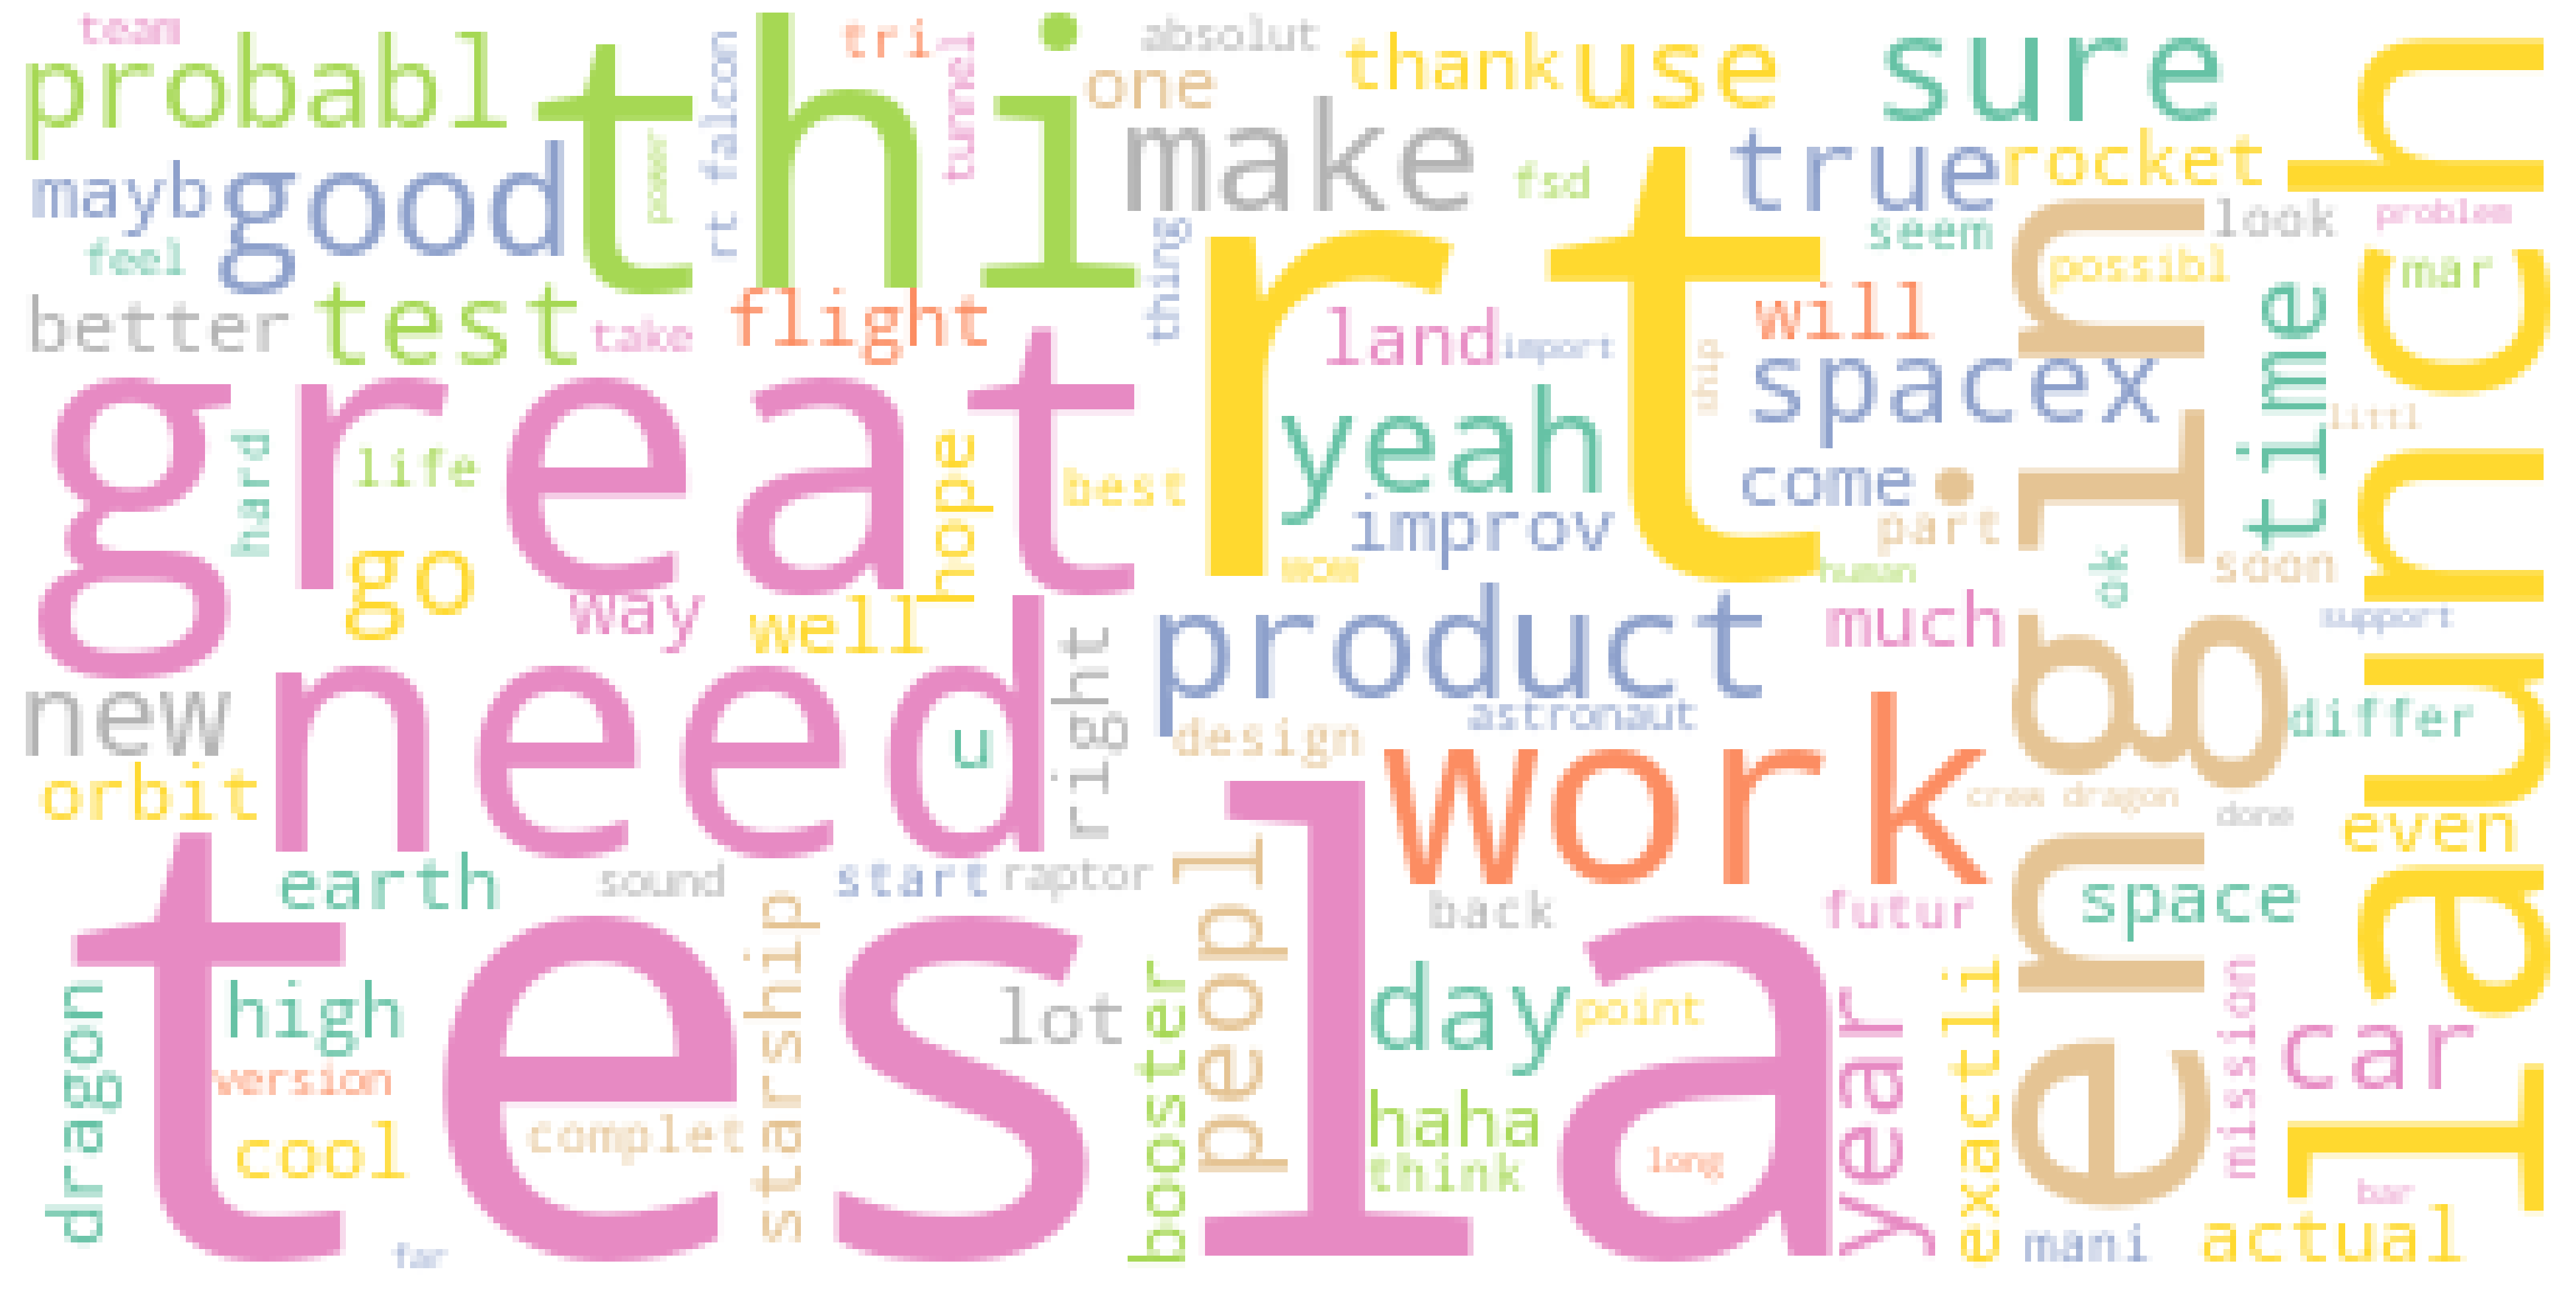

In [80]:
visual(word_cloud)

## NAME ENTITY RECOGNITION

In [101]:
nlp=spacy.load('en_core_web_sm')
one_block=nlp(clean)
two_block=nlp(one_block)
spacy.displacy.render(two_block,style='ent',jupyter=True)

In [104]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]

In [105]:
nouns_verbs

['trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tri',
 'interview',
 'doge',
 'year',
 'happi',
 'year',
 'ox',
 'frodo',
 'underdog',
 'thought',
 'fail',
 'inde',
 'repres',
 'time',
 'entertain',
 'outcom',
 'sent',
 'agre',
 'get',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'seem',
 'bit',
 'fix',
 'plea',
 'account',
 'thi',
 'power',
 'wallet',
 'give',
 'avoid',
 'cost',
 'app',
 'suck',
 'launch',
 'element',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'reason',
 'starlink',
 'technic',
 'econom',
 'endeavor',
 'spacex',
 'need',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'valu',
 'product',
 'made',
 'scalabl',
 'meant',
 'price',
 'onli',
 'differ',
 'tax',
 'ship',
 'thi',
 'intend',
 'earth',
 'idea',
 'team',
 'comp',
 'stock',
 'option',
 'take',
 'miss',
 'work',
 'go',
 'doe',
 'seem',
 'bit',
 'appear',
 'meaning',
 'fix',
 'coin',
 'unit',
 'time',
 'wherea',
 'orbit',
 'launch',
 'tower',
 'stack',
 'raptor',
 'orbit',
 'improv',
 'ship',
 '

In [106]:
a=count.fit_transform(nouns_verbs)

In [109]:
sum_a=a.sum(axis=0)
sum_a

matrix([[1, 1, 1, ..., 1, 1, 3]], dtype=int64)

In [110]:
sum_a.shape

(1, 1727)

In [112]:
for i,j in count.vocabulary_.items():
    print(i,sum_a[0,j])


trace 1
cyberpunk 5
hdr 1
nextlevel 2
tri 4
interview 4
doge 3
year 48
happi 4
ox 1
frodo 1
underdog 1
thought 7
fail 4
inde 5
repres 1
time 37
entertain 4
outcom 1
sent 2
agre 9
get 31
bought 3
dogecoin 2
lil 1
toddler 1
seem 18
bit 8
fix 9
plea 6
account 1
thi 37
power 11
wallet 1
give 8
avoid 2
cost 12
app 1
suck 3
launch 59
element 2
gateway 2
mission 18
predict 6
cash 3
flow 5
reason 5
starlink 11
technic 3
econom 1
endeavor 1
spacex 25
need 50
ton 5
carbon 3
valu 3
product 47
made 13
scalabl 1
meant 5
price 7
onli 4
differ 14
tax 1
ship 14
intend 2
earth 21
idea 6
team 16
comp 3
stock 7
option 7
take 16
miss 1
work 46
go 30
doe 1
appear 6
meaning 2
coin 1
unit 3
wherea 1
orbit 16
tower 2
stack 3
raptor 13
improv 9
booster 18
tonight 6
instruct 2
video 12
peopl 23
spoken 1
cute 1
reflect 1
rain 1
pain 2
u0001f3b6 1
let 6
come 38
crypto 1
geniu 1
yup 1
easi 6
intens 2
look 19
note 10
email 1
text 2
lesson 1
learn 3
tell 2
stori 6
tesla 62
read 8
kingdom 2
heard 3
name 9
thing 16
re

In [115]:
word_freq=[(words,sum_a[0,idf]) for words,idf in count.vocabulary_.items()]

In [116]:
word_freq

[('trace', 1),
 ('cyberpunk', 5),
 ('hdr', 1),
 ('nextlevel', 2),
 ('tri', 4),
 ('interview', 4),
 ('doge', 3),
 ('year', 48),
 ('happi', 4),
 ('ox', 1),
 ('frodo', 1),
 ('underdog', 1),
 ('thought', 7),
 ('fail', 4),
 ('inde', 5),
 ('repres', 1),
 ('time', 37),
 ('entertain', 4),
 ('outcom', 1),
 ('sent', 2),
 ('agre', 9),
 ('get', 31),
 ('bought', 3),
 ('dogecoin', 2),
 ('lil', 1),
 ('toddler', 1),
 ('seem', 18),
 ('bit', 8),
 ('fix', 9),
 ('plea', 6),
 ('account', 1),
 ('thi', 37),
 ('power', 11),
 ('wallet', 1),
 ('give', 8),
 ('avoid', 2),
 ('cost', 12),
 ('app', 1),
 ('suck', 3),
 ('launch', 59),
 ('element', 2),
 ('gateway', 2),
 ('mission', 18),
 ('predict', 6),
 ('cash', 3),
 ('flow', 5),
 ('reason', 5),
 ('starlink', 11),
 ('technic', 3),
 ('econom', 1),
 ('endeavor', 1),
 ('spacex', 25),
 ('need', 50),
 ('ton', 5),
 ('carbon', 3),
 ('valu', 3),
 ('product', 47),
 ('made', 13),
 ('scalabl', 1),
 ('meant', 5),
 ('price', 7),
 ('onli', 4),
 ('differ', 14),
 ('tax', 1),
 ('ship'

In [117]:
#used for sorting the counts
word_freq=sorted(word_freq,reverse=True,key=lambda x:x[1])# key is used to show the reverse is in column index 1 (reverse in count)
word_freq

[('tesla', 62),
 ('launch', 59),
 ('make', 51),
 ('need', 50),
 ('year', 48),
 ('product', 47),
 ('work', 46),
 ('come', 38),
 ('time', 37),
 ('thi', 37),
 ('land', 37),
 ('test', 37),
 ('use', 36),
 ('day', 36),
 ('starship', 32),
 ('get', 31),
 ('go', 30),
 ('car', 30),
 ('flight', 30),
 ('lot', 29),
 ('crew', 27),
 ('engin', 26),
 ('model', 26),
 ('spacex', 25),
 ('peopl', 23),
 ('earth', 21),
 ('point', 21),
 ('week', 20),
 ('probabl', 20),
 ('look', 19),
 ('rocket', 19),
 ('think', 19),
 ('way', 19),
 ('seem', 18),
 ('mission', 18),
 ('booster', 18),
 ('space', 18),
 ('month', 17),
 ('team', 16),
 ('take', 16),
 ('orbit', 16),
 ('thing', 16),
 ('hope', 16),
 ('part', 16),
 ('life', 16),
 ('start', 15),
 ('feel', 15),
 ('ai', 15),
 ('complet', 15),
 ('fire', 15),
 ('thank', 15),
 ('dragon', 15),
 ('differ', 14),
 ('ship', 14),
 ('futur', 14),
 ('version', 14),
 ('game', 14),
 ('done', 14),
 ('made', 13),
 ('raptor', 13),
 ('absolut', 13),
 ('today', 13),
 ('stage', 13),
 ('support'

In [119]:
word_df=pd.DataFrame(word_freq,columns=['Word','count'])

In [120]:
word_df

,Word,count
0,tesla,62
1,launch,59
2,make,51
3,need,50
4,year,48
...,...,...
1722,answer,1
1723,injuri,1
1724,propaganda,1
1725,click,1


<Axes: title={'center': 'top repeated words'}, xlabel='Word'>

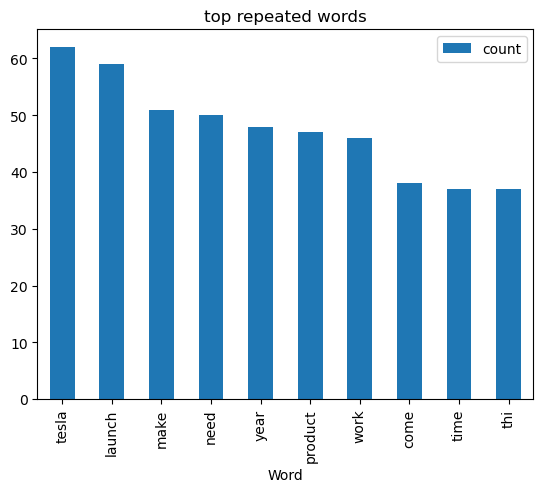

In [124]:
word_df[0:10].plot(kind='bar',x='Word',y='count',title='top repeated words')

## EMOTION MINING 

In [128]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [129]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [134]:
affin=pd.read_csv(r'C:\Users\aksha\Downloads\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [136]:
aff_dict=affin.set_index('word')['value'].to_dict()#converting the data frame to dict

In [137]:
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [138]:
#finding the emotion value
def sentiment_count(text:str):#only accept for strings(words)
  senti_count=0#variable to set count
  if text:#if only the input is string
    sentence=nlp(text)#aplying nlp to text and assign in sentence
    for token in sentence:#token is assign to all the words in sentence
      senti_count+=aff_dict.get(token.lemma_,0)#in aff_dict pick the value and assign to senti_count if the value is not there assign 0)
    return senti_count

In [139]:
sent_df['sentiment_count']=sent_df['sentence'].apply(sentiment_count)#applying our function in our dataframe column sentence and by applying this we will et the value count for all the columns

In [140]:
sent_df

,sentence,sentiment_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [141]:
sent_df.sort_values(by='sentiment_count')

,sentence,sentiment_count
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8
64,"Also, the road to hell is mostly paved with ba...",-7
923,"It may never pay out, as the stock cant b ht...",-4
683,"Occasional flights from land are ok, but frequ...",-4
...,...,...
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
588,The open areas https://t.co/rabjKrtQlw @Sav...,14
105,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16


In [153]:
#negative sentiment
negative=sent_df[sent_df['sentiment_count']<0]
negative

,sentence,sentiment_count,index
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,6
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-2,11
16,Thats what youre missing.,-2,16
23,https://t.co/UEEocOfcTb The people have spoken...,-3,23
47,Would be better to have small fees than no fee...,-2,47
...,...,...,...
889,This is primarily an electrical/electronic (ch...,-2,889
890,Will those who write the algorithms ever reali...,-3,890
897,No expert installer required.,-1,897
923,"It may never pay out, as the stock cant b ht...",-4,923


In [152]:
#positive sentiment
positive=sent_df[sent_df['sentiment_count']>=0]
positive

,sentence,sentiment_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3
4,Now on to the next for even more!!,0,4
...,...,...,...
920,This is both great &amp; terrifying.,3,920
921,Everything weve ever sensed or thought has be...,2,921
922,"@kenyanwalstreet Not actually a payout, just a...",0,922
924,Details Aug 28.,0,924


In [150]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3
4,Now on to the next for even more!!,0,4
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,922
923,"It may never pay out, as the stock cant b ht...",-4,923
924,Details Aug 28.,0,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,925


C:\Users\aksha\AppData\Local\Temp\ipykernel_19304\3544852693.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_count'])


<Axes: xlabel='sentiment_count', ylabel='Density'>

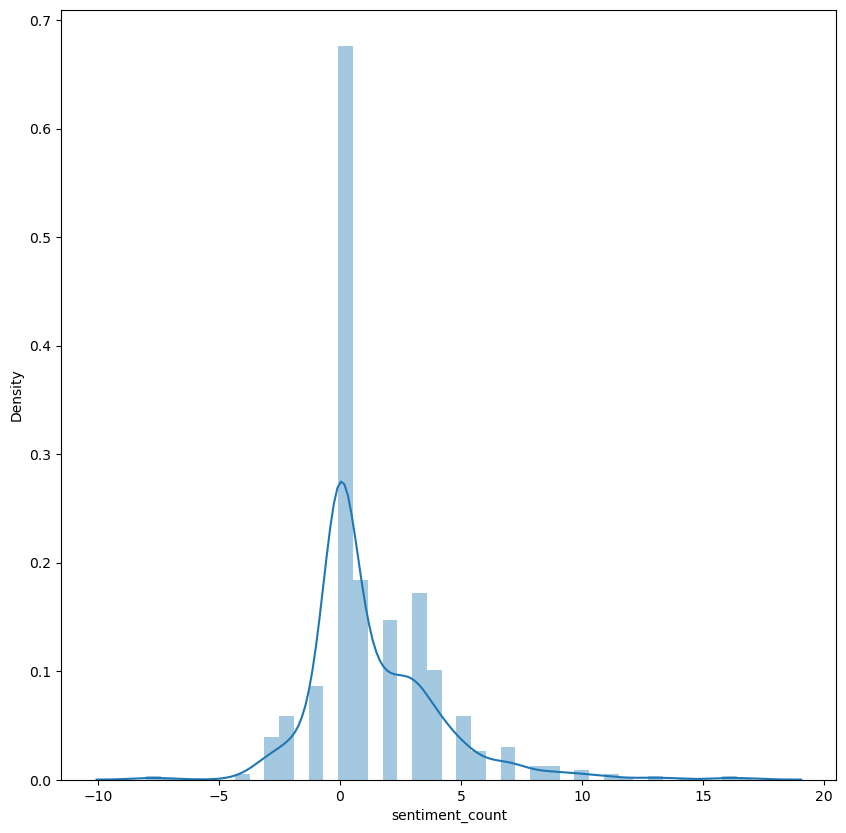

In [148]:
plt.figure(figsize=(10,10))
sns.distplot(sent_df['sentiment_count'])

<Axes: xlabel='index', ylabel='sentiment_count'>

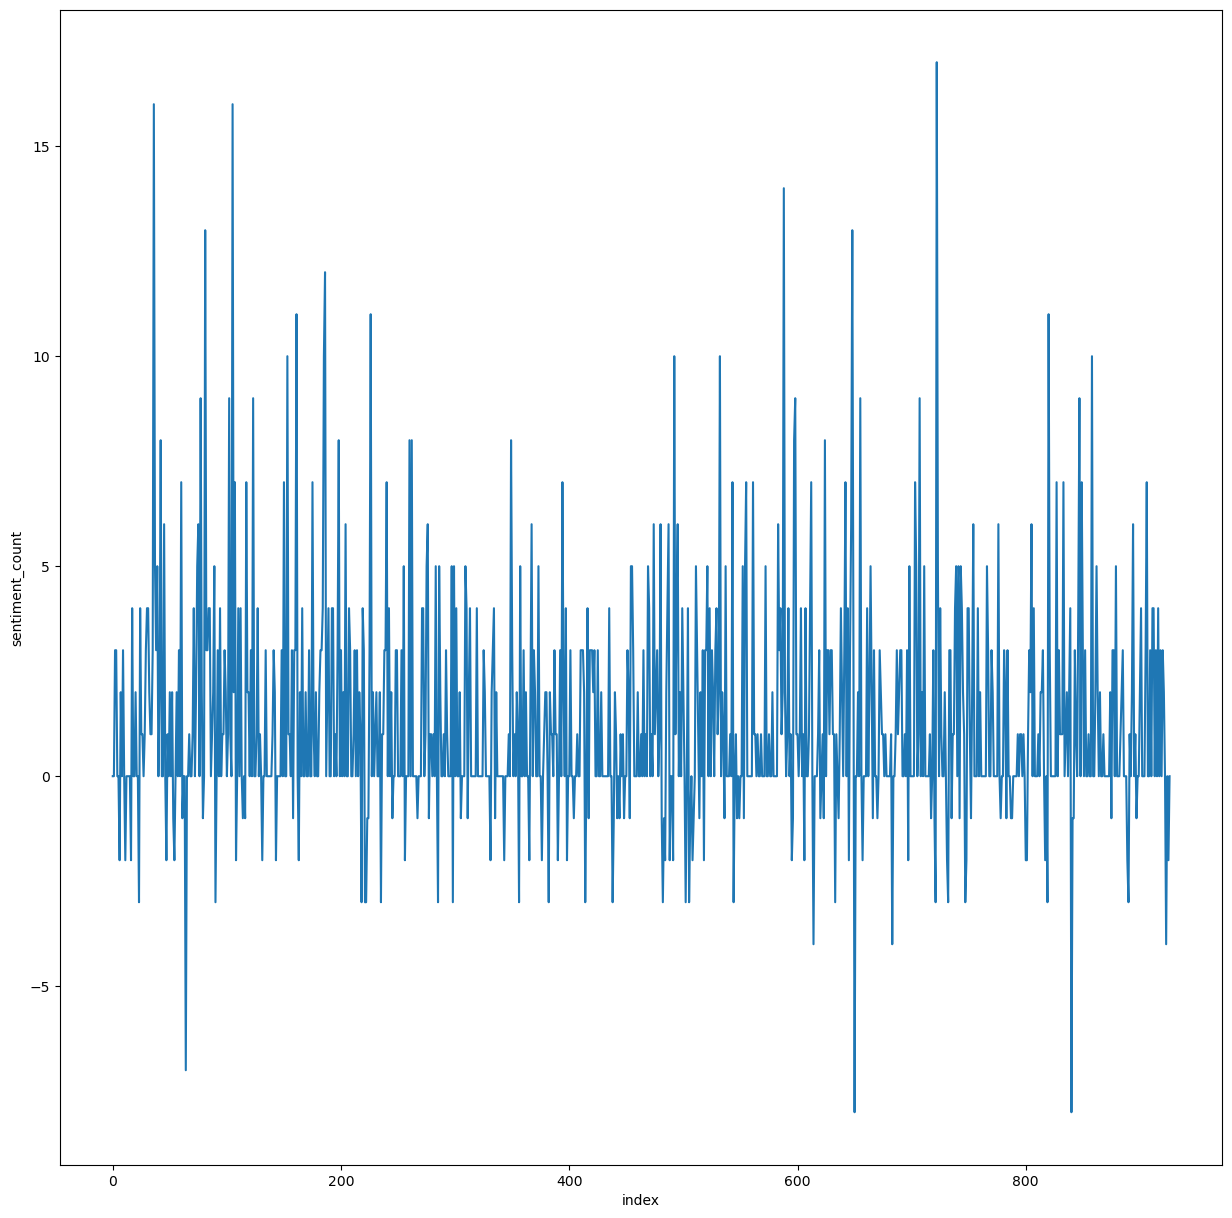

In [151]:
plt.figure(figsize=(15,15))
sns.lineplot(y='sentiment_count',x='index',data=sent_df)